In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("../14_trees/train.tsv", sep = "\t").dropna()

In [4]:
data

,species,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m
0,Fagus sylvatica,46.01,11.44,5.0,6.7,2.05
1,Fagus sylvatica,46.03,11.44,5.0,11.1,2.90
2,Fagus sylvatica,46.03,11.44,5.0,14.2,4.00
3,Fagus sylvatica,46.03,11.44,5.0,5.7,2.10
4,Fagus sylvatica,46.03,11.44,5.0,8.0,4.15
...,...,...,...,...,...,...
35094,Fagus sylvatica,47.38,9.09,36.0,22.6,4.50
35095,Fagus sylvatica,46.74,6.85,37.0,34.3,4.50
35096,Fagus sylvatica,47.45,9.29,38.0,33.8,5.00
35097,Fagus sylvatica,46.52,6.35,40.0,29.3,6.00


In [5]:
y = data["species"]

In [6]:
X = data[["latitude", "longitude", "stem_diameter_cm", "height_m", "crown_radius_m"]]

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [8]:
test = pd.read_csv("../14_trees/test.tsv", sep = "\t").dropna()

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [10]:
print(neigh.predict(X_val))

['Fagus sylvatica' 'Quercus ilex' 'Quercus ilex' ... 'Fagus sylvatica'
 'Fagus sylvatica' 'Pinus pinaster']


In [11]:
neigh.score(X_val, y_val)

0.917603474706183

In [12]:
prediction = pd.DataFrame()
prediction["tree_id"] = test.tree_id
prediction["species"] = neigh.predict(test.drop("tree_id",axis=1))

In [36]:
prediction.head()
# prediction.to_csv("species_pred_knn8.tsv",sep='\t', index=False)

,tree_id,species
0,T_75102,Fagus sylvatica
1,T_75103,Quercus ilex
2,T_75118,Quercus ilex
3,T_75152,Quercus ilex
4,T_75161,Quercus ilex


In [14]:
from tqdm.notebook import tqdm

  0%|          | 0/19 [00:00<?, ?it/s]

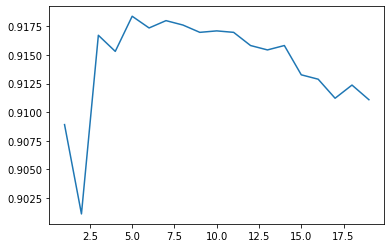

In [15]:
scores = []
for k in tqdm(range(1, 20)):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    scores.append(neigh.score(X_val, y_val))
    
import matplotlib.pyplot as plt
plt.plot(list(range(1,len(scores)+1)), scores)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X_train.min(axis=0), X_train.max(axis=0)

(latitude            36.263
 longitude           -9.148
 stem_diameter_cm     2.400
 height_m             1.500
 crown_radius_m       0.250
 dtype: float64,
 latitude             55.451
 longitude            26.000
 stem_diameter_cm    141.600
 height_m             41.200
 crown_radius_m       12.750
 dtype: float64)

In [18]:
scaler = StandardScaler().fit(X_train)
X_t = scaler.transform(X_train)
X_v = scaler.transform(X_val)

  0%|          | 0/19 [00:00<?, ?it/s]

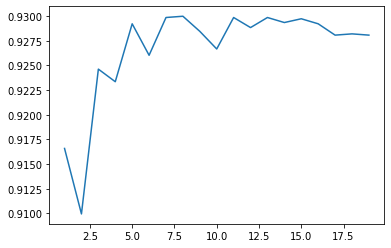

In [19]:
scores = []
for k in tqdm(range(1, 20)):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_t, y_train)
    scores.append(neigh.score(X_v, y_val))
    
import matplotlib.pyplot as plt
plt.plot(list(range(1,len(scores)+1)), scores)

In [20]:
from sklearn.decomposition import PCA

In [21]:
pc = PCA().fit_transform(X_train)

In [22]:
y_train.astype("category").cat.codes

1351     0
20290    2
28291    0
28228    2
7400     2
        ..
22499    2
26504    2
13116    1
27868    1
24644    2
Length: 23483, dtype: int8

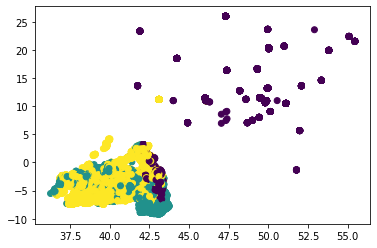

In [23]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train.astype("category").cat.codes)

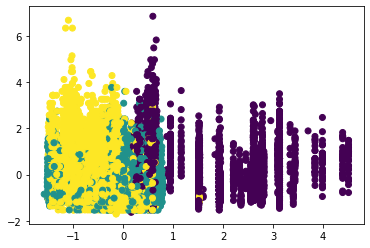

In [24]:
plt.scatter(X_t[:,0], X_t[:,4], c=y_train.astype("category").cat.codes)

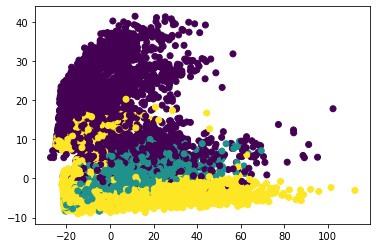

In [25]:
plt.scatter(pc[:,0], pc[:,1], c=y_train.astype("category").cat.codes)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
tree = DecisionTreeClassifier(max_depth=3)

In [28]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
tree.score(X_val, y_val)

0.8269034236075626

In [30]:
plt.rcParams["figure.figsize"] = (20,10)

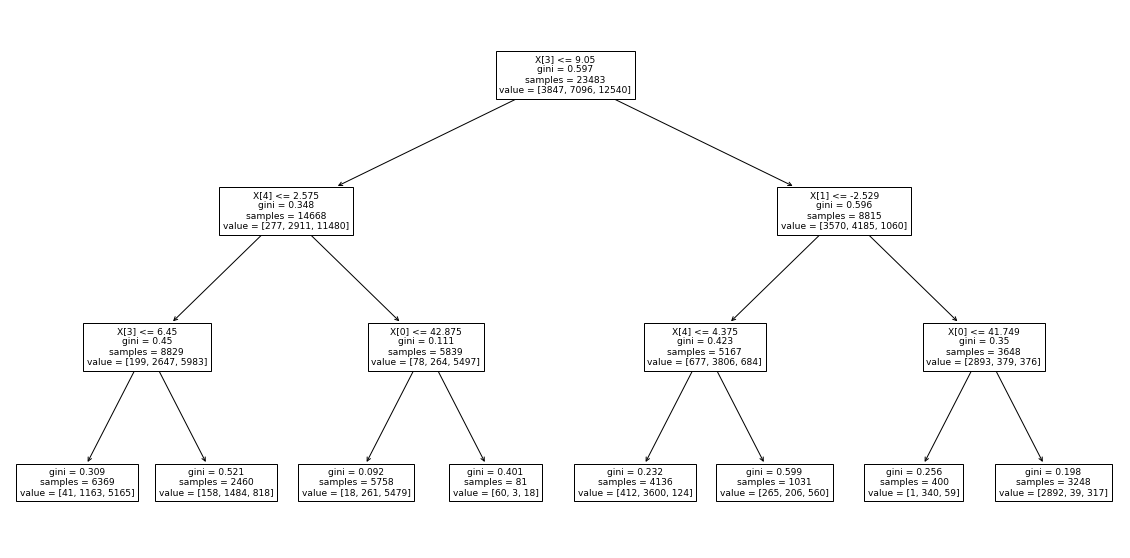

In [31]:
sklearn.tree.plot_tree(tree)
plt.show()

In [32]:
tree.feature_names_in_

array(['latitude', 'longitude', 'stem_diameter_cm', 'height_m',
       'crown_radius_m'], dtype=object)

In [33]:
from sklearn.tree import export_graphviz
gv = export_graphviz(tree, class_names=tree.classes_, feature_names=tree.feature_names_in_, impurity=False, filled=True)

In [34]:
import graphviz

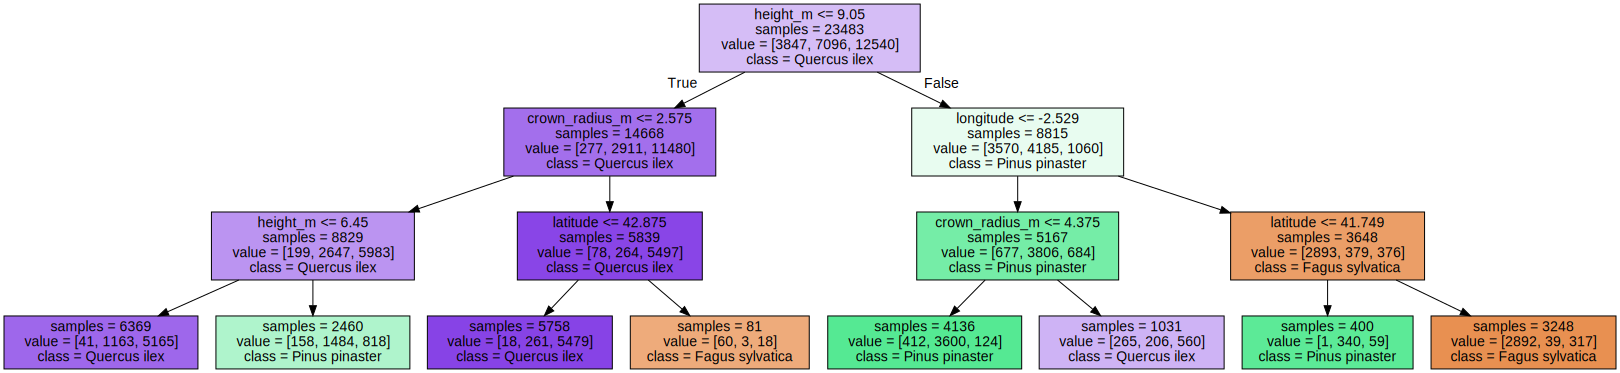

In [35]:
graphviz.Source(gv)